In [1]:
import xarray
import matplotlib.pyplot as mp
import cartopy
import numpy
import glob
import gdal
import matplotlib.colors

In [2]:
#filename = '/Users/baird/Dropbox/_data_observations/CALIPSO/CAL_LID_L2_05kmCPro-Standard-V4-10.2018-05-31T17-55-21ZN.hdf'
file_dir = '/beegfs/DATA/pritchard/blangenb/CALIPSO_DATA/'

In [3]:
file_list = sorted(glob.glob(file_dir+'/*.hdf'))

In [4]:
# ===== open file, pull out specific data set
gdal_file = gdal.Open(file_list[0])
gdal_subdatasets = gdal_file.GetSubDatasets()
gdal_clf_ds = gdal.Open(gdal_subdatasets[31][0]) # cloud fraction
gdal_tbc_ds = gdal.Open(gdal_subdatasets[35][0]) # total backscatter

In [5]:
gdal_clf_data = gdal_clf_ds.ReadAsArray()
gdal_tbc_data = gdal_tbc_ds.ReadAsArray()

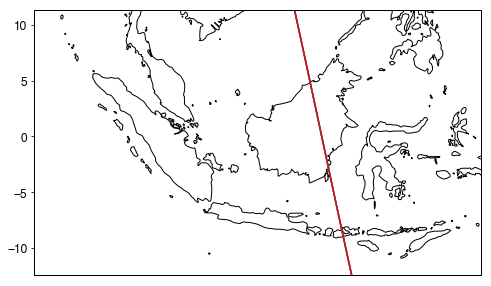

In [6]:
ds = xarray.open_dataset(file_list[0])

lat = ds['Latitude'].values
lon = ds['Longitude'].values


#####
fontsize=12
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([90,130,-12,11])
#ax.set_extent([50,180,-70,70])
ax.coastlines(resolution='50m')

ax.plot(lon,lat,c='firebrick')

ax.set_yticks([-10,-5,0,5,10])
ax.tick_params(labelsize=fontsize)

In [220]:
cod_data = ds['Column_Optical_Depth_Cloud_532'].values
ec_data = ds['Extinction_Coefficient_532'].values
rh_data = ds['Relative_Humidity'].values
p_data = ds['Pressure'].values
igbp_data = ds['IGBP_Surface_Type'].values
clf_data = ds['Cloud_Layer_Fraction'].values
avd_data = ds['Atmospheric_Volume_Description'].values
tbc_data = ds['Total_Backscatter_Coefficient_532'].values
ciab_data = ds['Column_Integrated_Attenuated_Backscatter_532'].values
iwc_data = ds['Ice_Water_Content_Profile'].values

In [234]:
avd_data.shape

(4208, 399, 2)

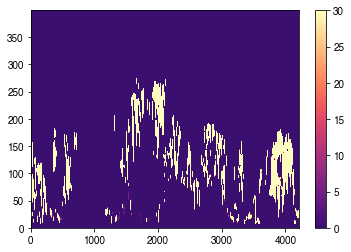

In [221]:
mp.pcolormesh(gdal_clf_data.T[::-1,:], cmap=cmap_partial, vmin=0, vmax=30); mp.colorbar()

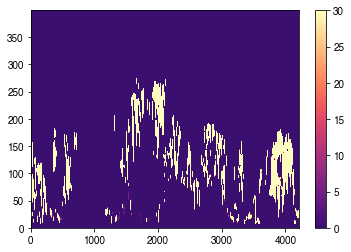

In [223]:
mp.pcolormesh(clf_data.T[::-1,:]/30, cmap=cmap_partial, vmin=0, vmax=30); mp.colorbar()

In [224]:
# make color map
minval=0.2 # for inferno:  0.18
maxval=1 # for inferno: 1.0
n=256
full_cmap = mp.get_cmap('magma')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval), full_cmap(numpy.linspace(minval, maxval, n)))

In [232]:
numpy.sum(gdal_tbc_data==-9999.)/gdal_tbc_data.size

0.9215225563909775

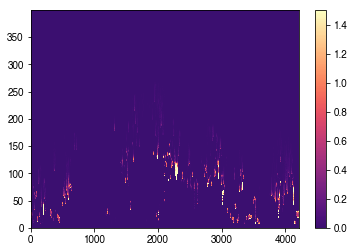

In [225]:
mp.pcolormesh(gdal_tbc_data.T[::-1,:], cmap=cmap_partial, vmin=0, vmax=1.5); mp.colorbar()

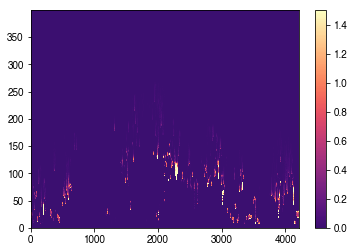

In [226]:
mp.pcolormesh(tbc_data.T[::-1,:], cmap=cmap_partial, vmin=0, vmax=1.5); mp.colorbar()

In [145]:
lat_2d = numpy.repeat(lat[:,0], p_data.shape[1]).reshape((p_data.shape))

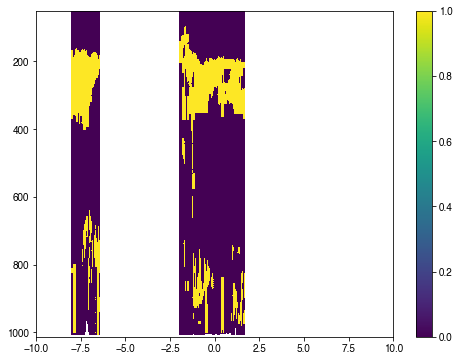

In [146]:
fig = mp.figure(figsize=(8,6))

ax = fig.add_subplot(111)
plot = ax.pcolormesh(lat_2d.T[::-1,:], p_data.T[::-1,:], \
                     clf_data.T[::-1,:], vmin=0, vmax=1)

ax.set_ylim(1013.25,50)
ax.set_xlim(-10,10)
fig.colorbar(plot)

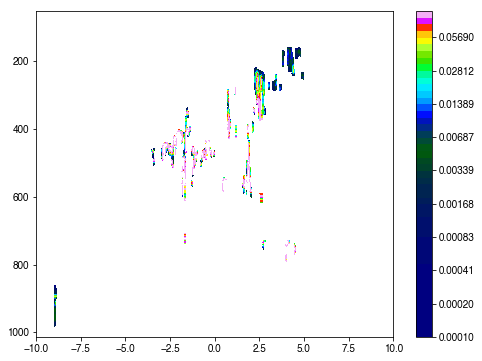

In [110]:
fig = mp.figure(figsize=(8,6))

ax = fig.add_subplot(111)
clevels = numpy.logspace(-4,-1)
# plot = ax.pcolormesh(lat_2d.T[::-1,:], p_data.T[::-1,:], \
#                      tbc_data.T[::-1,:], vmin=0, vmax=0.1)
plot = ax.contourf(lat_2d.T[::-1,:], p_data.T[::-1,:], \
                     tbc_data.T[::-1,:], levels=clevels, cmap='gist_ncar')

ax.set_ylim(1013.25,50)
ax.set_xlim(-10,10)
fig.colorbar(plot)

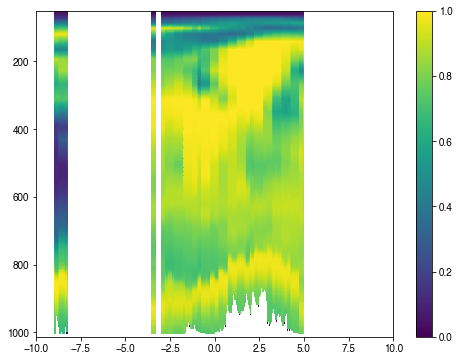

In [54]:
fig = mp.figure(figsize=(8,6))

ax = fig.add_subplot(111)
plot = ax.pcolormesh(lat_2d.T[::-1,:], p_data.T[::-1,:], \
                     rh_data.T[::-1,:], vmin=0, vmax=1)

ax.set_ylim(1013.25,50)
ax.set_xlim(-10,10)
fig.colorbar(plot)

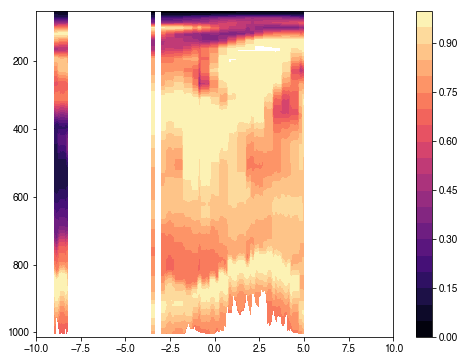

In [55]:
fig = mp.figure(figsize=(8,6))

clevels = numpy.arange(0,1.01,0.05)
ax = fig.add_subplot(111)
plot = ax.contourf(lat_2d.T[::-1,:], p_data.T[::-1,:], \
                     rh_data.T[::-1,:], levels=clevels, cmap='magma')

ax.set_ylim(1013.25,50)
ax.set_xlim(-10,10)
fig.colorbar(plot)